In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Path to your dataset
dataset_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

Mounted at /content/drive


# Step 1: Read and Display Original Images


## Preprocessing and Augmentation

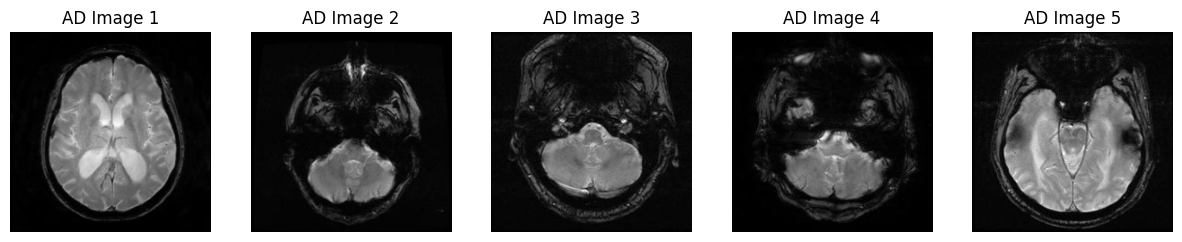

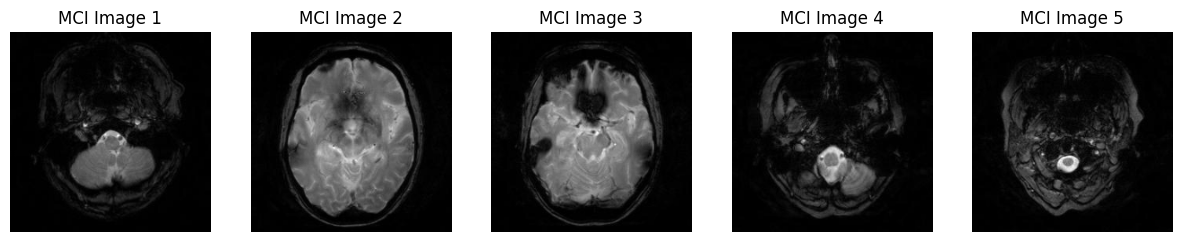

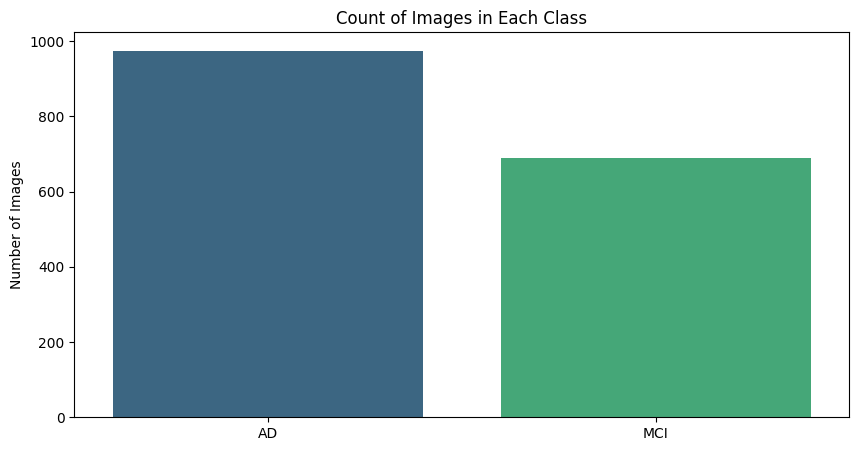

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size = 224

# Function to load and preprocess image
def load_and_preprocess_image(image_path, grayscale=False):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    if not grayscale:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert image to RGB format
    img = cv2.resize(img, (img_size, img_size))  # Resize the image to a specified size
    img = img.astype('float32') / 255.0  # Normalize the pixel values to the range [0, 1]
    return img

# Function to display images
def display_images(image_paths, title, grayscale=False):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img = load_and_preprocess_image(img_path, grayscale)
        if img is not None:
            plt.subplot(1, 5, i + 1)
            if grayscale:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
            plt.title(f"{title} Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD", grayscale=True)

# Display some MCI images
display_images(mci_images, "MCI", grayscale=True)

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD', 'MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

## Preprocess the data like an article

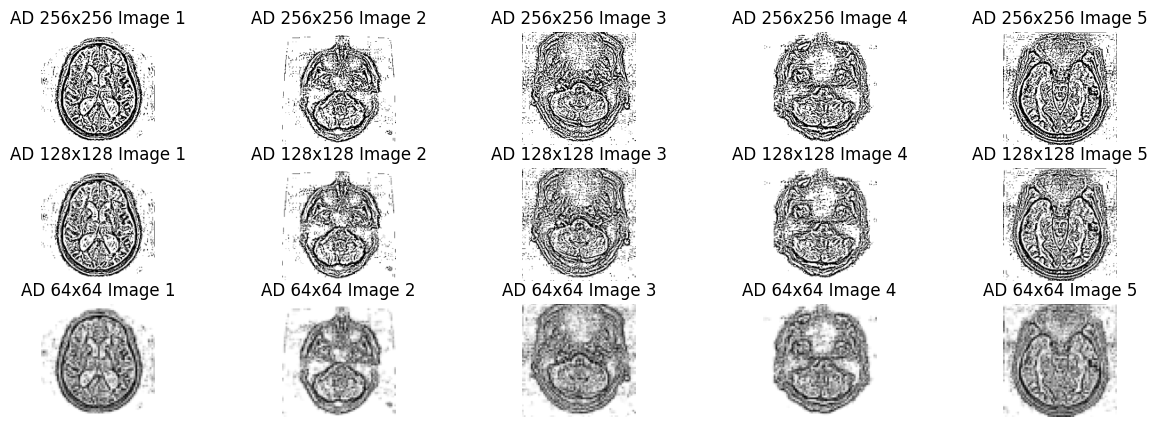

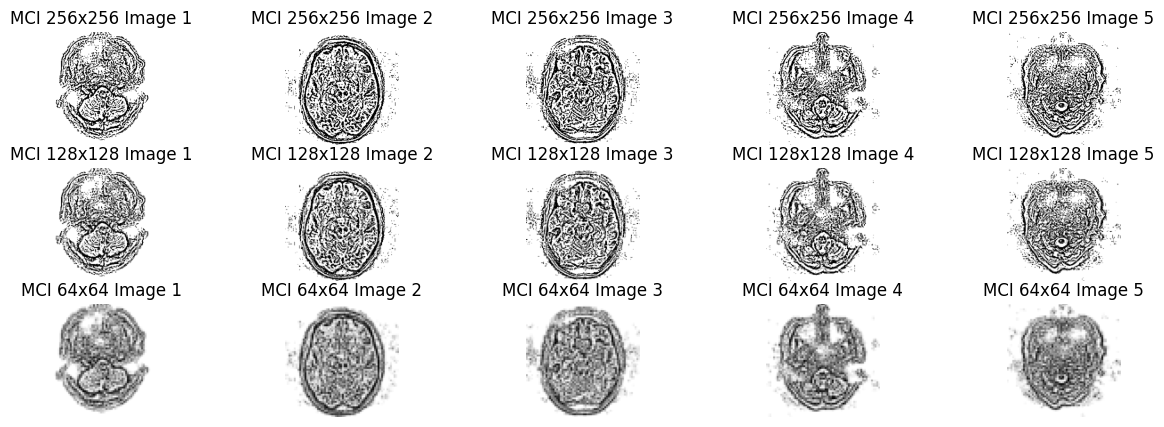

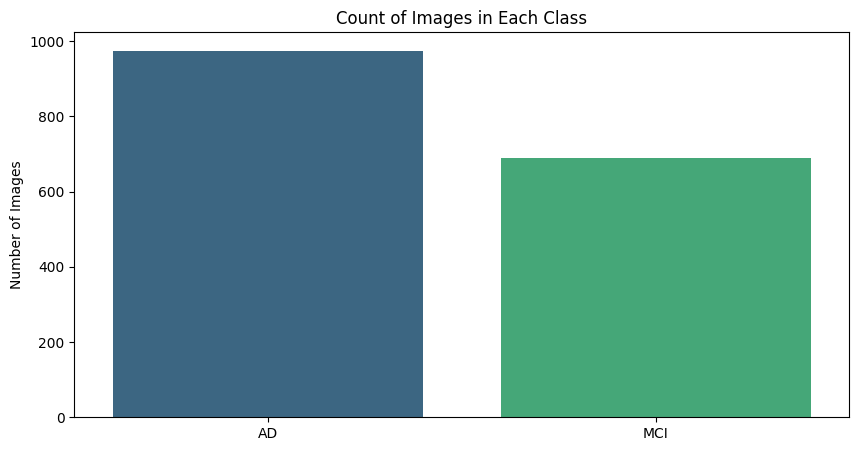

AD images count: 975
MCI images count: 689
Classes are correct and contain images.


In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)
img_size_128 = (128, 128)
img_size_64 = (64, 64)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    if img is None:
        print(f"Error loading image: {image_path}")
        return None

    # Adaptive thresholding
    img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

    # Crop and filter (for simplicity, we'll just resize to 256x256)
    img_resized = cv2.resize(img_thresh, img_size_256)

    # Resizing using skimage transformer
    img_128 = resize(img_resized, img_size_128, anti_aliasing=True)
    img_64 = resize(img_resized, img_size_64, anti_aliasing=True)

    return img_resized, img_128, img_64

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:5]):
        img_256, img_128, img_64 = load_and_preprocess_image(img_path)
        if img_256 is not None:
            plt.subplot(3, 5, i + 1)
            plt.imshow(img_256, cmap='gray')
            plt.title(f"{title} 256x256 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 6)
            plt.imshow(img_128, cmap='gray')
            plt.title(f"{title} 128x128 Image {i + 1}")
            plt.axis('off')

            plt.subplot(3, 5, i + 11)
            plt.imshow(img_64, cmap='gray')
            plt.title(f"{title} 64x64 Image {i + 1}")
            plt.axis('off')
    plt.show()

# Display some AD images
display_images(ad_images, "AD")

# Display some MCI images
display_images(mci_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_images)
mci_count = len(mci_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count],hue=['AD','MCI'], palette='viridis')
plt.title('Count of Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_images, mci_images)

# Step 2: Define Augmentation Functions


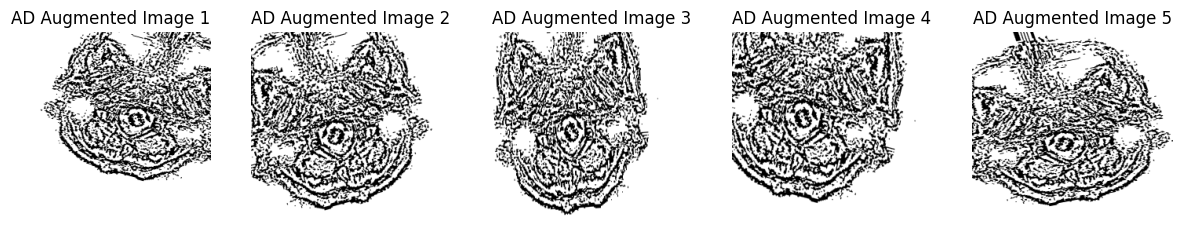

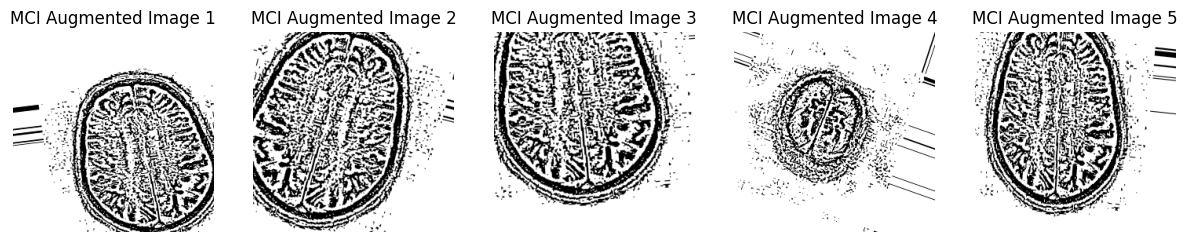

<ipython-input-4-033a82436e48>:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count], palette='viridis')


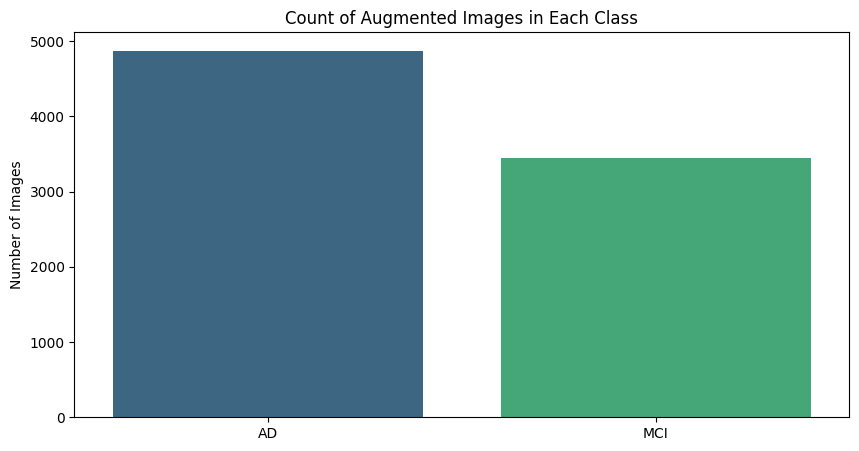

AD images count: 4875
MCI images count: 3445
Classes are correct and contain images.


In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from multiprocessing import Pool, cpu_count
from PIL import Image

# Paths to the directories containing the AD and MCI images
ad_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
mci_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'
ad_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_AD'
mci_save_path = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/Augmented_MCI'

# Create directories to save augmented images if they don't exist
os.makedirs(ad_save_path, exist_ok=True)
os.makedirs(mci_save_path, exist_ok=True)

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory) if image.endswith('.jpg') or image.endswith('.png')]

# Get the list of image file paths for AD and MCI images
ad_images = get_image_paths(ad_path)
mci_images = get_image_paths(mci_path)

# Define the image size for resizing
img_size_256 = (256, 256)

# Function to load, preprocess, and transform image
def load_and_preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Load as grayscale
        img = np.array(img)

        # Adaptive thresholding
        img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        # Resize to 256x256
        img_resized = cv2.resize(img_thresh, img_size_256)

        return img_resized
    except Exception as e:
        print(f"Error loading image: {image_path}, error: {e}")
        return None

# Data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,
    zoom_range=0.2
)

# Function to augment and save images in batches
def augment_and_save_images(image_paths, save_dir, total_augmentations, batch_size=32):
    count = 0
    images_needed = total_augmentations * len(image_paths)
    while count < images_needed:
        for image_path in image_paths:
            img = load_and_preprocess_image(image_path)
            if img is not None:
                img = np.expand_dims(img, axis=-1)  # Add channel dimension
                img = np.expand_dims(img, axis=0)   # Add batch dimension
                aug_iter = datagen.flow(img, batch_size=1)
                for _ in range(total_augmentations):
                    aug_img = aug_iter.next()[0].astype('uint8')
                    save_path = os.path.join(save_dir, f"augmented_{count}.png")
                    cv2.imwrite(save_path, aug_img[:, :, 0])
                    count += 1
                    if count >= images_needed:
                        break
            if count >= images_needed:
                break

# Desired number of augmentations (total images should be 5 times the original images)
total_augmentations = 5

# Augment and save AD and MCI images
augment_and_save_images(ad_images, ad_save_path, total_augmentations)
augment_and_save_images(mci_images, mci_save_path, total_augmentations)

# Display some augmented images
def display_augmented_images(image_paths, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_images]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{title} Augmented Image {i + 1}")
        plt.axis('off')
    plt.show()

# Get augmented image paths for display
ad_augmented_images = get_image_paths(ad_save_path)
mci_augmented_images = get_image_paths(mci_save_path)
display_augmented_images(ad_augmented_images, "AD")
display_augmented_images(mci_augmented_images, "MCI")

# Draw count plot of each class
ad_count = len(ad_augmented_images)
mci_count = len(mci_augmented_images)
plt.figure(figsize=(10, 5))
sns.barplot(x=['AD', 'MCI'], y=[ad_count, mci_count], palette='viridis')
plt.title('Count of Augmented Images in Each Class')
plt.ylabel('Number of Images')
plt.show()

# Check if classes are correct
def check_classes(ad_images, mci_images):
    ad_count = len(ad_images)
    mci_count = len(mci_images)
    print(f"AD images count: {ad_count}")
    print(f"MCI images count: {mci_count}")
    if ad_count > 0 and mci_count > 0:
        print("Classes are correct and contain images.")
    else:
        print("One or both classes are missing images.")

check_classes(ad_augmented_images, mci_augmented_images)


In [ ]:
from sklearn.model_selection import train_test_split
import shutil
import random

# Function to split data into train, test, and validation sets
def split_data(image_paths, train_dir, test_dir, val_dir, train_split=0.7, test_split=0.2, val_split=0.1):
    random.shuffle(image_paths)
    total_images = len(image_paths)
    train_count = int(total_images * train_split)
    test_count = int(total_images * test_split)

    train_images = image_paths[:train_count]
    test_images = image_paths[train_count:train_count + test_count]
    val_images = image_paths[train_count + test_count:]

    # Copy images to train directory
    for image_path in train_images:
        shutil.copy(image_path, train_dir)

    # Copy images to test directory
    for image_path in test_images:
        shutil.copy(image_path, test_dir)

    # Copy images to validation directory
    for image_path in val_images:
        shutil.copy(image_path, val_dir)

# Define paths for train, test, and validation directories
train_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/train'
test_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/test'
val_dir = '/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/validation'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Split AD augmented images
split_data(ad_augmented_images, train_dir + '/AD', test_dir + '/AD', val_dir + '/AD')

# Split MCI augmented images
split_data(mci_augmented_images, train_dir + '/MCI', test_dir + '/MCI', val_dir + '/MCI')


## Import Required Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


## Proposed Model


In [ ]:
def build_proposed_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
proposed_model = build_proposed_model(input_shape)
proposed_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                   

## Compile, Fit, and Save the Model for TensorBoard

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# Compile the model
proposed_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/logs', histogram_freq=1)

# Fit the model
history = proposed_model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[tensorboard_callback]
)

# Save the model
proposed_model.save('/content/drive/My Drive/Deep learning/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/model.h5')


NameError: name 'train_generator' is not defined

## Testing Model 1


In [ ]:
def build_testing_model_1(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1 = build_testing_model_1(input_shape)
testing_model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

## Testing Model 2


In [ ]:
def build_testing_model_2(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2 = build_testing_model_2(input_shape)
testing_model_2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 508032)            0         
                                                                 
 dense_5 (Dense)             (None, 128)               65028224  
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                      

## Import Required Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
import numpy as np
import os


  ## Proposed Model with Dropout


In [ ]:
def build_proposed_model_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

input_shape = (256, 256, 1)  # Example input shape
dropout_rate = 0.5
proposed_model_with_dropout = build_proposed_model_with_dropout(input_shape, dropout_rate)
proposed_model_with_dropout.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 conv2d_9 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                 

## Testing Model 1 with Dropout


In [ ]:
def build_testing_model_1_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_1_with_dropout = build_testing_model_1_with_dropout(input_shape, dropout_rate)
testing_model_1_with_dropout.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 123008)            0         
                                                                 
 dense_11 (Dense)            (None, 128)              

## Testing Model 2 with Dropout


In [ ]:
def build_testing_model_2_with_dropout(input_shape, dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    return model

testing_model_2_with_dropout = build_testing_model_2_with_dropout(input_shape, dropout_rate)
testing_model_2_with_dropout.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 254, 254, 32)      320       
                                                                 
 conv2d_15 (Conv2D)          (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 508032)            0         
                                                                 
 dense_13 (Dense)            (None, 128)               65028224  
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

## Compile and Train the Models


In [ ]:
# Compile the models
def compile_and_train_model(model, train_generator, val_generator, epochs=10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
    return history

# Assume train_generator and val_generator are already defined
# Example using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/path/to/dataset',
    target_size=(256, 256),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    '/path/to/dataset',
    target_size=(256, 256),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

# Train the proposed model with dropout
history_proposed_with_dropout = compile_and_train_model(proposed_model_with_dropout, train_generator, val_generator, epochs=10)

# Train testing model 1 with dropout
history_testing_1_with_dropout = compile_and_train_model(testing_model_1_with_dropout, train_generator, val_generator, epochs=10)

# Train testing model 2 with dropout
history_testing_2_with_dropout = compile_and_train_model(testing_model_2_with_dropout, train_generator, val_generator, epochs=10)


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/dataset'

In [ ]:
def evaluate_model(model, test_generator):
    test_loss, test_acc = model.evaluate(test_generator)
    test_generator.reset()
    predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
    y_true = test_generator.classes
    y_pred = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    auc = roc_auc_score(y_true, predictions[:, 1])
    f1 = f1_score(y_true, y_pred, average='binary')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUC: {auc}")
    print(f"F1 Score: {f1}")

# Evaluate the proposed model with dropout
evaluate_model(proposed_model_with_dropout, val_generator)

# Evaluate testing model 1 with dropout
evaluate_model(testing_model_1_with_dropout, val_generator)

# Evaluate testing model 2 with dropout
evaluate_model(testing_model_2_with_dropout, val_generator)
